In [136]:
import os
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sweetviz as sv

from seaborn_analyzer import CustomPairPlot
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from tqdm import tqdm
from IPython.display import HTML


import config

# 最大表示列数の指定（ここでは50列を指定）
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)
pd.set_option("display.width", 2000)

In [2]:
def make_dir(dir_name: str):
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)

# 各遺伝子データの読み込み

In [3]:
df_cna = pd.read_table(config.RAW_BRCA_METABRIC_DIR + "/data_cna.txt", index_col=0).T
df_cna = df_cna.drop(df_cna.index[0])

df_methylation_promoters_rrbs = pd.read_table(
    config.RAW_BRCA_METABRIC_DIR + "/data_methylation_promoters_rrbs.txt", index_col=0
).T

df_mrna_agilent_microarray_zscores_ref_all_samples = pd.read_table(
    config.RAW_BRCA_METABRIC_DIR
    + "/data_mrna_agilent_microarray_zscores_ref_all_samples.txt",
    index_col=0,
).T

df_mrna_agilent_microarray = pd.read_table(
    config.RAW_BRCA_METABRIC_DIR + "/data_mrna_agilent_microarray.txt", index_col=0
).T

# 　ファイルの中身が壊れているため、使用するなら要修正
# df_mutations = pd.read_table(config.RAW_BRCA_METABRIC_DIR + "/data_mutations.txt").T


# 各dfの中身変更防止の為setを仕様
df_set = (
    df_cna,
    df_methylation_promoters_rrbs,
    df_mrna_agilent_microarray_zscores_ref_all_samples,
    df_mrna_agilent_microarray,
    # df_mutations
)
df_name_set = (
    "df_cna",
    "df_methylation_promoters_rrbs",
    "df_mrna_agilent_microarray_zscores_ref_all_samples",
    "df_mrna_agilent_microarray",
    # "df_mutations"
)

# 特徴量が重複していないか確認
遺伝子名が数多く存在するので、特徴量の名前に重複がないか確認する。

In [4]:
for df, df_name in zip(df_set, df_name_set):
    print("*****" * 5, df_name, "の重複columns", "*****" * 5)
    for k, v in collections.Counter(df.columns.tolist()).items():
        if v > 1:
            print(k)

************************* df_cna の重複columns *************************
PALM2AKAP2
************************* df_methylation_promoters_rrbs の重複columns *************************
************************* df_mrna_agilent_microarray_zscores_ref_all_samples の重複columns *************************
HERC2P9
RPL7A
RBMY1F
MUC3A
TP53TG3D
RDH5
TRDV2
NIPAL1
PCDHA@
SMG1P5
RIOK3
SRR
BOLA2
CEP170
SPAG8
GNG10
PPM1H
NSUN5
IGLL1
CBWD1
FCGR1A
MAGED4B
LINC00965
RPL36
ILKAP
CD24
HLA-DRB4
SLC25A37
DYNLRB1
LINC00937
BMS1P21
PLAGL1
RPAIN
LSP1
MRPL23
LINC01089
DMRTC1B
LINC00869
RPL13A
RPL5
OTUD7A
SBDS
INTS4
SRGAP2
MS4A18
PIN4
XG
PCSK6
CORT
CEP164
RPL37
AFAP1
FAM163B
CLK2
BMS1
SNRPN
BIRC5
IGSF9B
RPL4
CTTNBP2NL
WASH3P
LINC01128
BMS1P4
PMS2P1
MZT2A
RFFL
P2RX5
FAM153A
CYP2D6
SLX1A
NBPF1
AIDA
OR1D5
MRPL45P2
CSPG4P5
FAM230A
PPT2
DDX17
NME1
RPL39
RPL13
LIMS3
CES5A
TSPY1
NNT
DND1
GOLGA6L5P
MT1E
STAG3
DEPDC4
YWHAE
TNRC18
UBE2V1
OPLAH
PDE4C
ARHGEF10
RPL23AP82
FAM182A
NOP56
CT47A1
ARID1B
C4orf50
KIF5C
CCT6A
CCDC57
SUMO1
KCTD5


In [5]:
# shapeの確認
print(df_name_set)
print([df.shape for df in df_set])

('df_cna', 'df_methylation_promoters_rrbs', 'df_mrna_agilent_microarray_zscores_ref_all_samples', 'df_mrna_agilent_microarray')
[(2173, 22544), (1418, 13188), (1905, 24368), (1905, 24368)]


In [20]:
# total null num

for df, df_name in zip(df_set, df_name_set):
    print("*****" * 5, df_name, "の合計null数", "*****" * 5)
    print(df.isnull().sum().sum())
    print("*****" * 5, df_name, "の各columnsのnullの数", "*****" * 5)
    print(df.isnull().sum().sort_values(ascending=False).head(467))

************************* df_cna の合計null数 *************************
2356
************************* df_cna の各columnsのnullの数 *************************
Hugo_Symbol
LCE3C       41
GSTT1       35
GSTM1       31
HLA-DRB5    29
TAS2R43     29
            ..
PRR20C       1
POU5F1B      1
NEUROG2      1
PLIN1        0
PMVK         0
Length: 467, dtype: int64
************************* df_methylation_promoters_rrbs の合計null数 *************************
555316
************************* df_methylation_promoters_rrbs の各columnsのnullの数 *************************
Hugo_Symbol
CUL5        432
PHYHD1      427
ANKRD6      427
MIR1193     426
TTC39A      426
           ... 
GRM2        267
TMEM132C    267
PTPMT1      267
HN1L        267
MBTPS1      267
Length: 467, dtype: int64
************************* df_mrna_agilent_microarray_zscores_ref_all_samples の合計null数 *************************
5887
************************* df_mrna_agilent_microarray_zscores_ref_all_samples の各columnsのnullの数 *************************


In [21]:
# Finding missing data and the percentage of it in each column

for df, df_name in zip(df_set, df_name_set):
    print("*****" * 5, df_name, "の各columnsのnullの全体データ数に対する割合", "*****" * 5)
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat(
        [total, percent], axis=1, keys=["Total_NaN", "Percent_Nan"]
    )
    display(missing_data.head())

************************* df_cna の各columnsのnullの全体データ数に対する割合 *************************


,Total_NaN,Percent_Nan
Hugo_Symbol,,
LCE3C,41,0.018868
GSTT1,35,0.016107
GSTM1,31,0.014266
HLA-DRB5,29,0.013346
TAS2R43,29,0.013346


************************* df_methylation_promoters_rrbs の各columnsのnullの全体データ数に対する割合 *************************


,Total_NaN,Percent_Nan
Hugo_Symbol,,
CUL5,432,0.304654
PHYHD1,427,0.301128
ANKRD6,427,0.301128
MIR1193,426,0.300423
TTC39A,426,0.300423


************************* df_mrna_agilent_microarray_zscores_ref_all_samples の各columnsのnullの全体データ数に対する割合 *************************


,Total_NaN,Percent_Nan
Hugo_Symbol,,
SLC25A19,2,0.001050
AK127905,2,0.001050
CSNK2A1,2,0.001050
CX758427,1,0.000525
SNORD100,1,0.000525


************************* df_mrna_agilent_microarray の各columnsのnullの全体データ数に対する割合 *************************


,Total_NaN,Percent_Nan
Hugo_Symbol,,
SLC25A19,2,0.001050
AK127905,2,0.001050
CSNK2A1,2,0.001050
CX758427,1,0.000525
SNORD100,1,0.000525


************************* df_cna のnull数の可視化 *************************


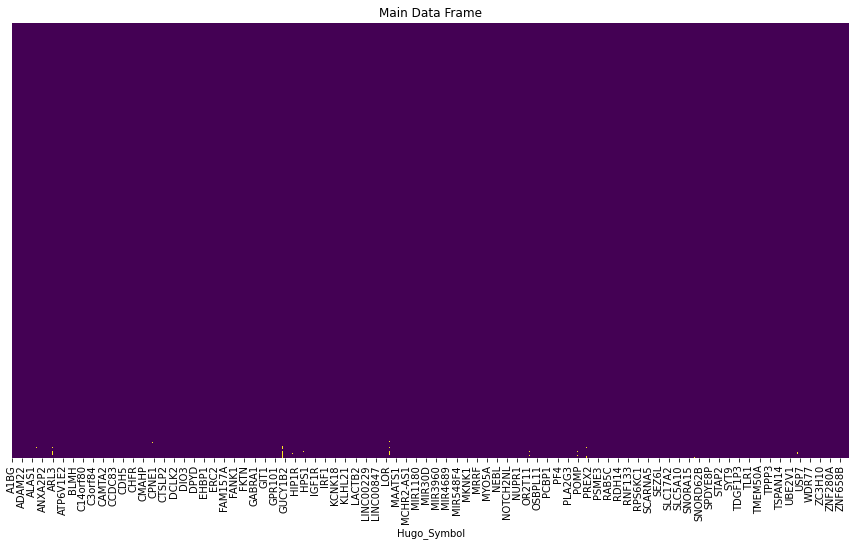

************************* df_methylation_promoters_rrbs のnull数の可視化 *************************


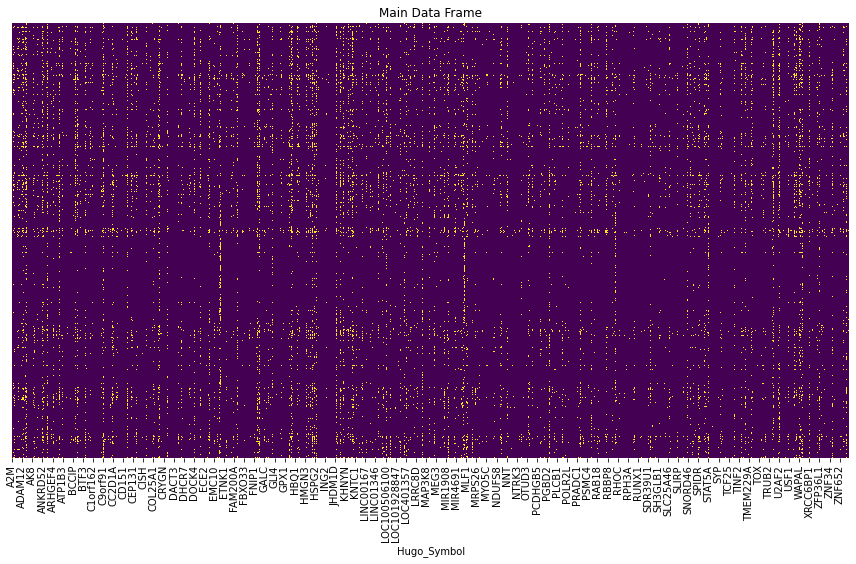

************************* df_mrna_agilent_microarray_zscores_ref_all_samples のnull数の可視化 *************************


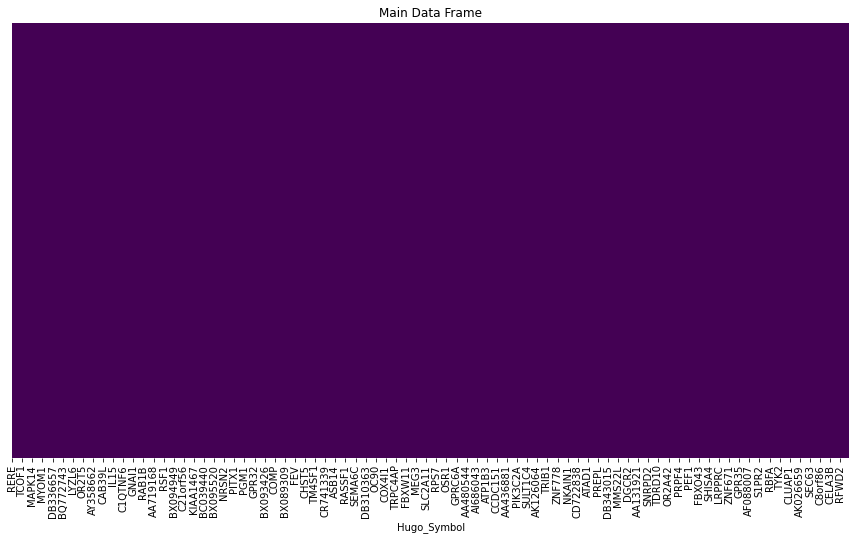

************************* df_mrna_agilent_microarray のnull数の可視化 *************************


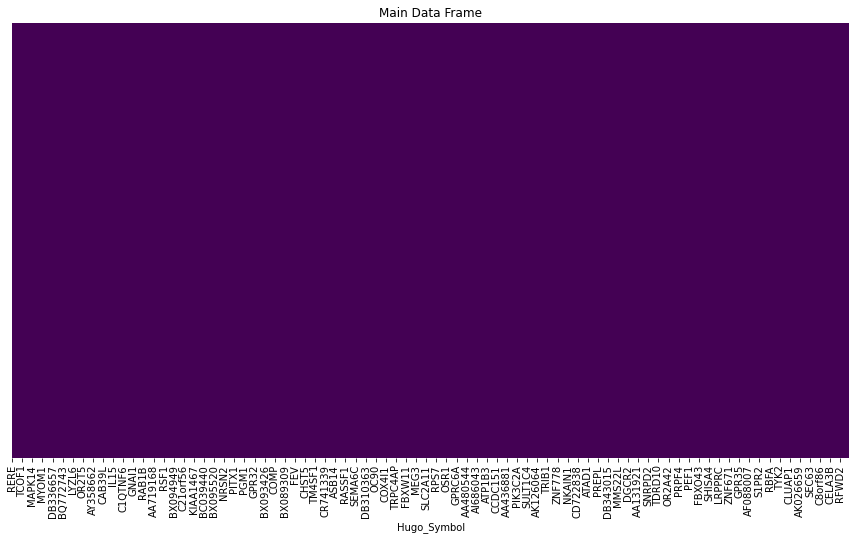

In [22]:
# Visualization of missing data
%matplotlib inline


for df, df_name in zip(df_set, df_name_set):
    print("*****" * 5, df_name, "のnull数の可視化", "*****" * 5)
    fig, ax = plt.subplots(figsize=(15, 8))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")
    ax.set_title("Main Data Frame")
    plt.show();

## indexと対応させるために読み込み

### 目的変数の生成

元のdfにはない目的変数カラム（5年後の生存の有無）を生成する。

#### 目的変数｜5年後の予後の2値分類
5年後の予後を2値分類する。  
そのためにVITAL_STATUSとOS_MONTHを利用する。  
以下のフローチャートで生成する。  

In [23]:
HTML(
    '<div class="mxgraph" style="max-width:100%;border:1px solid transparent;" data-mxgraph="{&quot;highlight&quot;:&quot;#0000ff&quot;,&quot;nav&quot;:true,&quot;resize&quot;:true,&quot;toolbar&quot;:&quot;zoom layers tags lightbox&quot;,&quot;edit&quot;:&quot;_blank&quot;,&quot;xml&quot;:&quot;&lt;mxfile host=\&quot;Electron\&quot; modified=\&quot;2022-05-01T07:33:42.0.405Z\&quot; agent=\&quot;5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) draw.io/17.2.0.2 Chrome/100.0.4896.60 Electron/18.0.1 Safari/537.36\&quot; etag=\&quot;CUa6MuG2A-EYqdbBh0ys\&quot; version=\&quot;17.2.0.2\&quot; type=\&quot;device\&quot;&gt;&lt;diagram id=\&quot;C5RBs43oDa-KdzZeNtuy\&quot; name=\&quot;Page-1\&quot;&gt;7VhZc5swEP41TJ7a4Yix/RjbcZI2SduBJNOnjAIyqBasK4SP/vpKQTIQXB9tncMTP3jYZVlJ+317gOH0k/kZQ5P4CkJMDdsM54YzMGy7ZZniXyoWhcLtOoUiYiQsVFap8MgvrJTquSgnIc5qhhyAcjKpKwNIUxzwmg4xBrO62QhofdUJinBD4QWINrV3JORxoe3Y7VJ/jkkU65Utt1vcSZA2VifJYhTCrKJyTg2nzwB4cZXM+5jK2Om43F0s7ujl2D379C37iW56n/3r2w+Fs+EujyyPwHDK/69ru3A9RTRX8VJn5QsdQAZ5GmLpxDScXswTKi4tcfkDc75QgKOcg1AB4zFEkCJ6CTBRdiNIuTKzpIzT8EQCK+QHCsG4UA0JpWoNISn7jpAyzmC8xE46WAIhjSl6wLSHgnH0uNE+UGDiVgoplq5CQQZ1lnJzp6W2t2VsFQYZ5CzAa+xUcnDEIrzOn1vYyf1VeKqQO8OQYM4WwoBhijiZ1smMVE5ES7sSd3GhoN+BBk6DBuHIaPVuL/yTy3vPP/FvPMMWrs0v3v3Vl2v/3DNagzVMkSjNYsKxN0GP4ZqJ2lJnT5UV4uC9iKIsU5hugHw3yKaYcTxfG2R911WZrkpdR4mzsm5YuhjElZpxbO4JluMGLN9FKX1P0H9JUHfLBNX9a2OGKrJoYmydsMrTVyDiXKUJjEaZ2NhT6iwX/Hs2tRpsuoYGmTbj8abp9kJkau/GJevVc8ltcKnsDDITXJTIek+5jLm8b+raWi1cMSQPeba5V9QAlvQZooRQGaxzTKeYkwCt6CiIkigVQiCwxmw1c8SSJI2E5JaS/8hUUXz32Gna9U6zlKutxlzRajr7ajXt1ROAYrZs9maB4xDRDB9c63fsJ4B0X7r3d7ap1m+6Fj9769dldXPvt7as14o95kdH/GoEev3jQHer4fJ9HtgPw+xDmwj0Dit8qr8+qv5xNCCCLLYJI/E3IBlGGT56Hw3+OBrYqzrRs44GuhpWZwMmAnFoM8DT1/9j56VnAF0lNk9lPssPfyhzrP0BIsTyS25RE8vP4c7pbw==&lt;/diagram&gt;&lt;/mxfile&gt;&quot;}"></div><script type="text/javascript" src="https://viewer.diagrams.net/js/viewer-static.min.js"></script>'
)

In [108]:
df_MB = pd.read_pickle(config.INTERIM_PICKLE_EDA_DIR + "/df_MB.pkl")

df_MB["target_OS_5years"] = np.nan
df_MB["target_OS_5years"] = df_MB["target_OS_5years"].mask(
    df_MB["OS_MONTHS"] > 60, False
)
df_MB["target_OS_5years"] = df_MB["target_OS_5years"].mask(
    (df_MB["OS_MONTHS"] <= 60) & (df_MB["VITAL_STATUS"] == "Died of Disease"),
    True,
)
df_MB["target_OS_5years"] = df_MB["target_OS_5years"].astype(bool)
# targetを定義できなかったデータは除く
# df_MB = df_MB[df_MB["target_OS_5years"].notnull()]

# 治療クラスの値変更
df_MB["HORMONE_THERAPY"].replace({"YES": 1, "NO": 0}, inplace=True)
df_MB["RADIO_THERAPY"].replace({"YES": 1, "NO": 0}, inplace=True)
df_MB["BREAST_SURGERY"].replace({"BREAST CONSERVING": 1, "MASTECTOMY": 0}, inplace=True)

# 目的変数生成で使用した特徴量を削除
df_MB.drop(["OS_MONTHS", "OS_STATUS", "VITAL_STATUS"], axis=1, inplace=True)

# data_cnaについてEDA

patient_idをキーとしてmerge  
5年後の生存の有無と遺伝子情報を紐付ける

In [109]:
# df_MB（patient_idと目的変数のみ）とdf_cnaをpatient_id（Hugo_Symbol：reset_indexによってindexがHugo_Symbolとなっている）をキーとして結合
df_MB_genes = pd.merge(
    df_MB[
        [
            "PATIENT_ID",
            "target_OS_5years",
            # "HORMONE_THERAPY",
            # "RADIO_THERAPY",
            # "BREAST_SURGERY",
        ]
    ],
    df_cna.reset_index(),
    right_on="index",
    left_on="PATIENT_ID",
).drop("index", axis=1)

df_MB_genes = df_MB_genes.set_index("PATIENT_ID")

df_cna.shape, df_MB.shape, df_MB_genes.shape

((2173, 22544), (1985, 34), (1985, 22545))

In [110]:
df_MB_genes[df_MB_genes["target_OS_5years"] != np.nan]

,target_OS_5years,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AACSP1,AADAC,AADACL2,AADACL3,AADACL4,AADAT,AAED1,AAGAB,AAK1,AAMDC,AAMP,AANAT,...,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSCAN9,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZSWIM8,ZSWIM8-AS1,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MB-0000,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MB-0002,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,-1.0,-1.0,...,0.0,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
MB-0005,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0
MB-0006,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
MB-0008,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,0.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MB-7295,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MB-7296,True,0.0,0.0,0.0,1.0,1.0,1.0,1.0,-1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,1.0,0.0,2.0,-1.0,1.0,...,0.0,0.0,0.0,0.0,2.0,-1.0,2.0,0.0,-1.0,1.0,-1.0,0.0,0.0,-1.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
MB-7297,False,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,-1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,2.0,0.0,-1.0,0.0,-1.0,0.0


In [111]:
# 遺伝子のdfとdf_MBを結合したら、遺伝子のdfで見られないpatient_idがあったのでsortしてpatient_idの確認
# sortした結果、無事あったので、結合処理は大丈夫だろう
df_cna.sort_index()

Hugo_Symbol,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AACSP1,AADAC,AADACL2,AADACL3,AADACL4,AADAT,AAED1,AAGAB,AAK1,AAMDC,AAMP,AANAT,AAR2,...,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSCAN9,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZSWIM8,ZSWIM8-AS1,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
MB-0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MB-0002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,-1.0,-1.0,0.0,...,0.0,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
MB-0005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0
MB-0006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
MB-0008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,0.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MTS-T2412,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,2.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,-1.0,2.0,2.0,0.0,-1.0,-1.0,0.0,0.0,-1.0
MTS-T2413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
MTS-T2414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,-1.0,1.0,2.0,2.0,1.0,-1.0,0.0
MTS-T2415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0


In [112]:
# データ数の差
df_MB_genes[df_MB_genes.target_OS_5years == True].shape, df_MB_genes[
    df_MB_genes.target_OS_5years == False
].shape

((495, 22545), (1490, 22545))

# 特徴量選択

特徴量選択手法によって、膨大な遺伝子の数を削減する  
- filter method
- wrapper method
- embedded method
の3つの手法がある

https://qiita.com/FukuharaYohei/items/db88a8f4c4310afb5a0d

nullを含んでいるとできないので、nullを削除する

In [113]:
df_MB_genes.shape, df_MB_genes.dropna().shape

((1985, 22545), (1903, 22545))

In [114]:
df_MB_genes.dropna(inplace=True)

## filter method

### χ^2法



In [115]:
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2

In [116]:
df_MB_genes

,target_OS_5years,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AACSP1,AADAC,AADACL2,AADACL3,AADACL4,AADAT,AAED1,AAGAB,AAK1,AAMDC,AAMP,AANAT,...,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSCAN9,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZSWIM8,ZSWIM8-AS1,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MB-0000,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MB-0002,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,-1.0,-1.0,...,0.0,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
MB-0005,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0
MB-0006,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
MB-0010,True,2.0,2.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MB-7295,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MB-7296,True,0.0,0.0,0.0,1.0,1.0,1.0,1.0,-1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,1.0,0.0,2.0,-1.0,1.0,...,0.0,0.0,0.0,0.0,2.0,-1.0,2.0,0.0,-1.0,1.0,-1.0,0.0,0.0,-1.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
MB-7297,False,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,-1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,2.0,0.0,-1.0,0.0,-1.0,0.0


In [138]:
df_tmp

,target_OS_5years,ZNF718
0,0.0,0.50
1,0.0,0.25
2,0.0,0.50
3,0.0,0.50
4,1.0,0.25
...,...,...
1898,0.0,0.50
1899,1.0,0.50
1900,0.0,0.50
1901,0.0,0.75


In [141]:
selector = SelectKBest(chi2, k=2)


def transform_minmaxscaler(df: pd.DataFrame):
    # x,y軸の特徴量の標準化
    mm = MinMaxScaler()
    mm.fit(df)
    df = pd.DataFrame(
        mm.transform(df),
        index=df.index,
        columns=df.columns,
    )
    return df


df_MB_minmax = transform_minmaxscaler(df_MB_genes)


df_tmp = pd.DataFrame(
    selector.fit_transform(df_MB_minmax, df_MB_minmax["target_OS_5years"]),
    columns=df_MB_minmax.columns.values[selector.get_support()],
)
result = pd.DataFrame(
    selector.get_support(),
    index=df_MB_minmax.columns.values,
    columns=["False: dropped"],
)
result["score"] = selector.scores_
result["pvalue"] = selector.pvalues_
result[result["False: dropped"] == True]

,False: dropped,score,pvalue
target_OS_5years,True,1429.000000,0.000000
CCDC43,True,7.255901,0.007067


In [142]:
selector = SelectKBest(mutual_info_classif, k=2)

df_tmp = pd.DataFrame(
    selector.fit_transform(df_MB_genes, df_MB_genes["target_OS_5years"]),
    columns=df_MB_genes.columns.values[selector.get_support()],
)
result = pd.DataFrame(
    selector.get_support(), index=df_MB_genes.columns.values, columns=["False: dropped"]
)
result["score"] = selector.scores_
result["pvalue"] = selector.pvalues_
result[result["False: dropped"] == True]

,False: dropped,score,pvalue
target_OS_5years,True,0.561585,None
BCL7C,True,0.037753,None
